<a href="https://colab.research.google.com/github/shauryasingh000/VideoGames_Sales_report/blob/main/Video_game_sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'videogamesales:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F284%2F618%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240905%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240905T073124Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D09b39e0f9f5c4a706ae2c6de439e0b5473bc5288f7a9419dfd35af5d77d154685a92622f20464ba5e5c88161e2b6c476817dbd8bf5f24d8eadcf20dc351786bf9570b955e3f7f74fe3c350d74a6d45c31ffcef66b3a29d6e36ac87c628c8c9be7538ee8e76e45fbb7e78d33701f966e819704e96275ecfd6bc5416f7902be4b12c67af31c725583eae31d71baaa17dfdae8f5c36df1a53c45ded2ba1729c1ef4695ef55579efd54759b0c724dbd4de8b2bacae1cd1be23fcc7ce88966c5cbfc9f6df6e929b14d4c9acda1436aabbc0c217de83432897cbc49c58a5d7f6012ef6643d8e5c5a2d3105743f2aa303d466a4f0c1d6c379dd4463673353b05b0d570a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [ ]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df = df.iloc[:, 1:]

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [ ]:
df.drop_duplicates(keep='first', inplace = True)
df.duplicated().sum()

0

In [ ]:
numerical_summary = df.describe()
categorical_summary = df.describe(include=['object'])

skewness = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].skew()
kurtosis = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].kurt()

missing_data = df.isnull().sum()

platform_counts = df['Platform'].value_counts()
genre_counts = df['Genre'].value_counts()
publisher_counts = df['Publisher'].value_counts()

In [ ]:
print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)
print("\nMissing Data:\n", missing_data)
print("\nPlatform Counts:\n", platform_counts)
print("\nGenre Counts:\n", genre_counts)
print("\nPublisher Counts:\n", publisher_counts)

Numerical Summary:
                Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16597.000000  16597.000000  16597.000000  16597.000000   
mean    2006.406443      0.264683      0.146661      0.077785      0.048066   
std        5.828981      0.816705      0.505365      0.309300      0.188594   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16597.000000  
mean       0.537472  
std        1.555070  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  

Categorical Summary:
                                Name Platform   

<Axes: title={'center': 'Number of Games Released Per Year'}, xlabel='Year'>

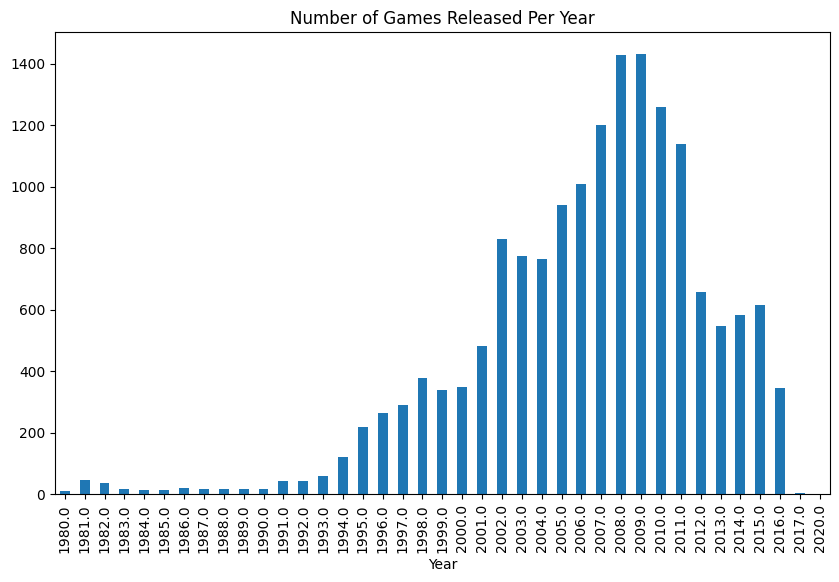

In [ ]:
games_per_year = df['Year'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(10,6), title='Number of Games Released Per Year')

<Axes: title={'center': 'Total Sales Per Year by Region'}, xlabel='Year'>

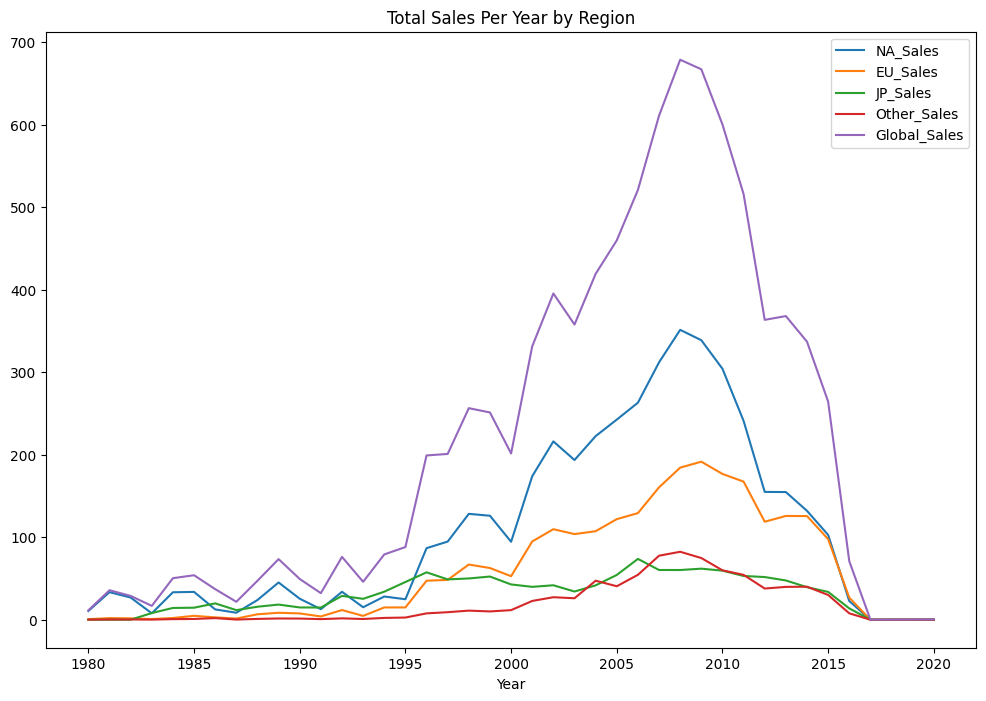

In [ ]:
sales_per_year = df.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sales_per_year.plot(kind='line', figsize=(12,8), title='Total Sales Per Year by Region')

<Axes: title={'center': 'Platform Popularity Over Time'}, xlabel='Year'>

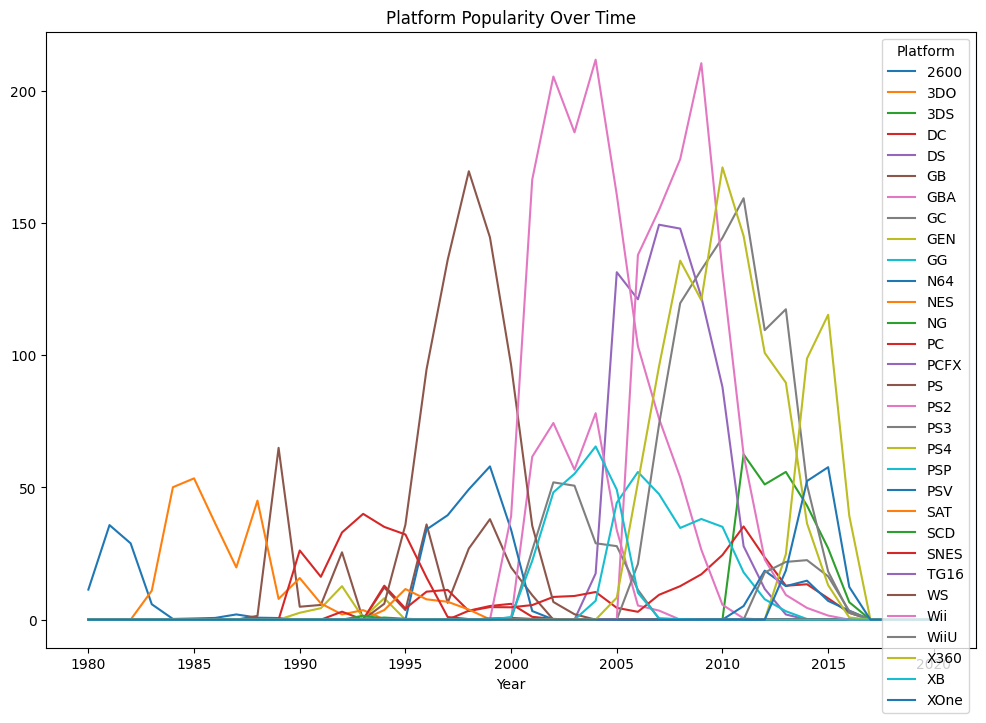

In [ ]:
platform_sales_per_year = df.groupby(['Year', 'Platform']).sum()['Global_Sales'].unstack().fillna(0)
platform_sales_per_year.plot(kind='line', stacked=False, figsize=(12,8), title='Platform Popularity Over Time')

<Axes: title={'center': 'Regional Sales Trends Over Time'}, xlabel='Year'>

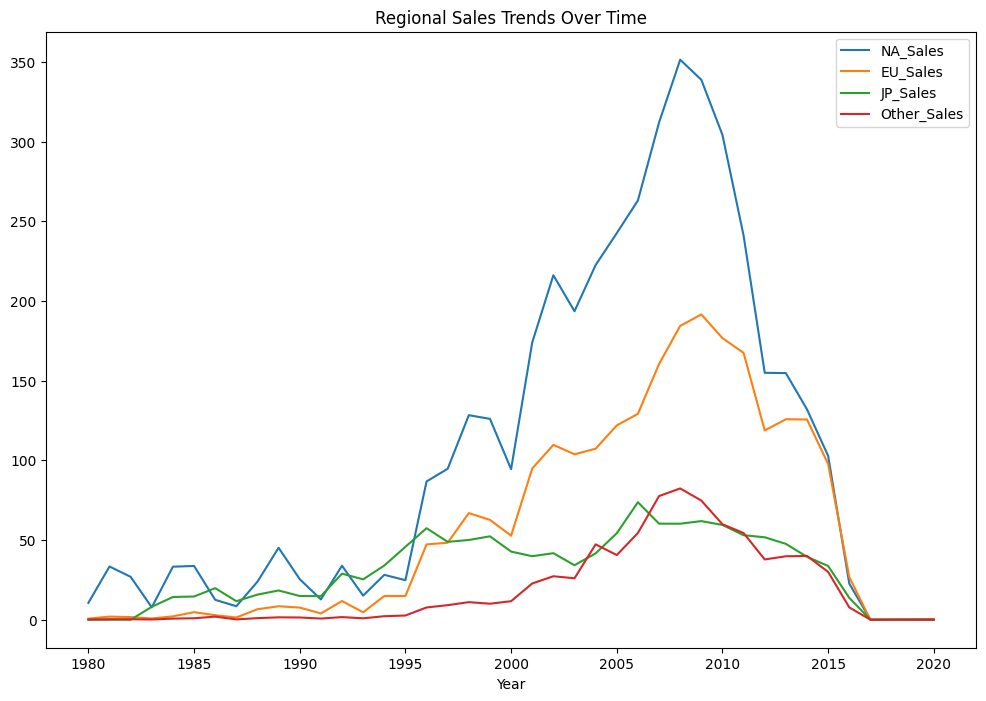

In [ ]:
regional_sales_per_year = df.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
regional_sales_per_year.plot(kind='line', figsize=(12,8), title='Regional Sales Trends Over Time')

<Axes: title={'center': 'Total Sales Distribution by Region'}>

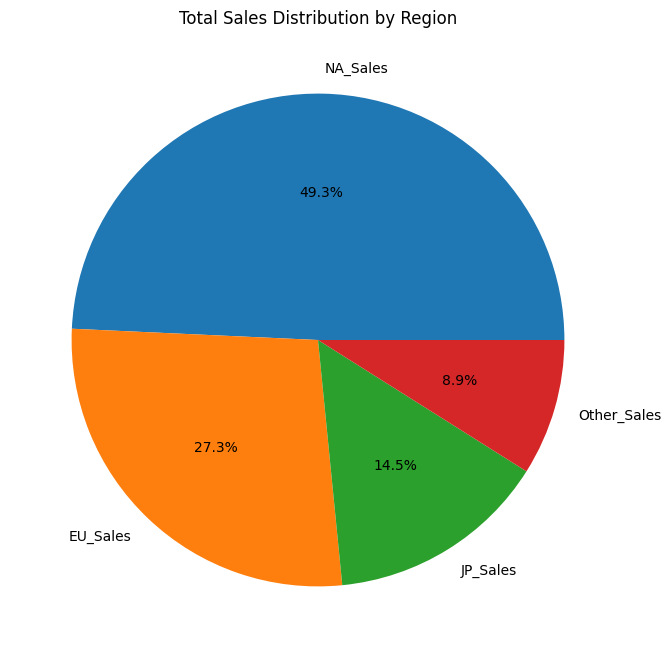

In [ ]:
total_sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
total_sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Total Sales Distribution by Region')

<Axes: title={'center': 'Top 10 Games in North America'}, xlabel='Name'>

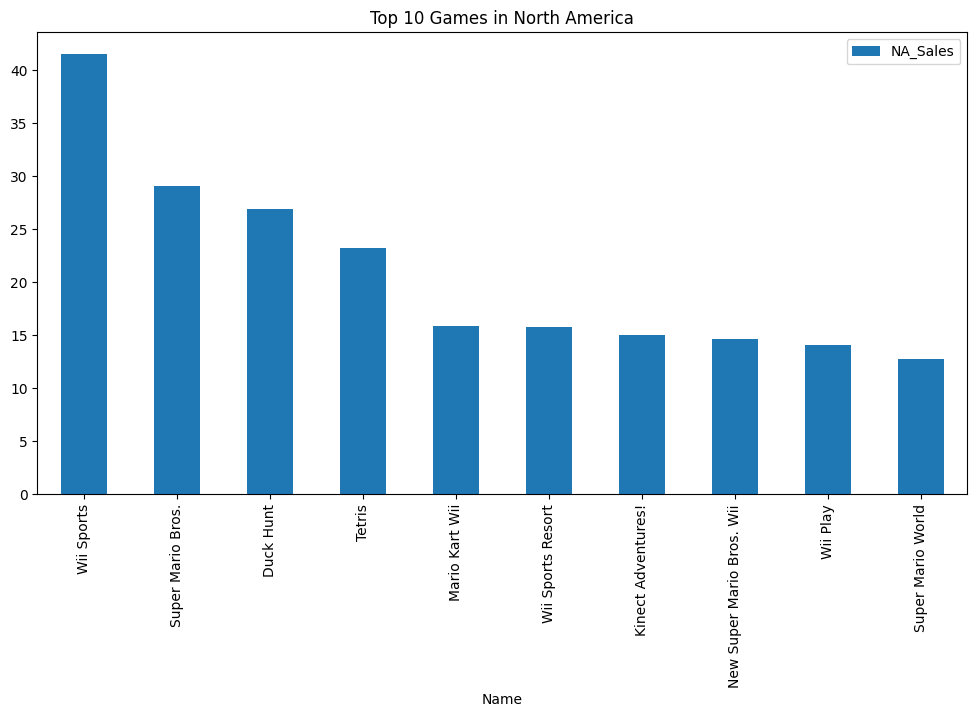

In [ ]:
top_games_na = df[['Name', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(10)
top_games_eu = df[['Name', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(10)
top_games_jp = df[['Name', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head(10)
top_games_other = df[['Name', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head(10)
top_games_na.plot(kind='bar', x='Name', y='NA_Sales', figsize=(12,6), title='Top 10 Games in North America')

<Axes: title={'center': 'Genre Popularity by Region'}, xlabel='Genre'>

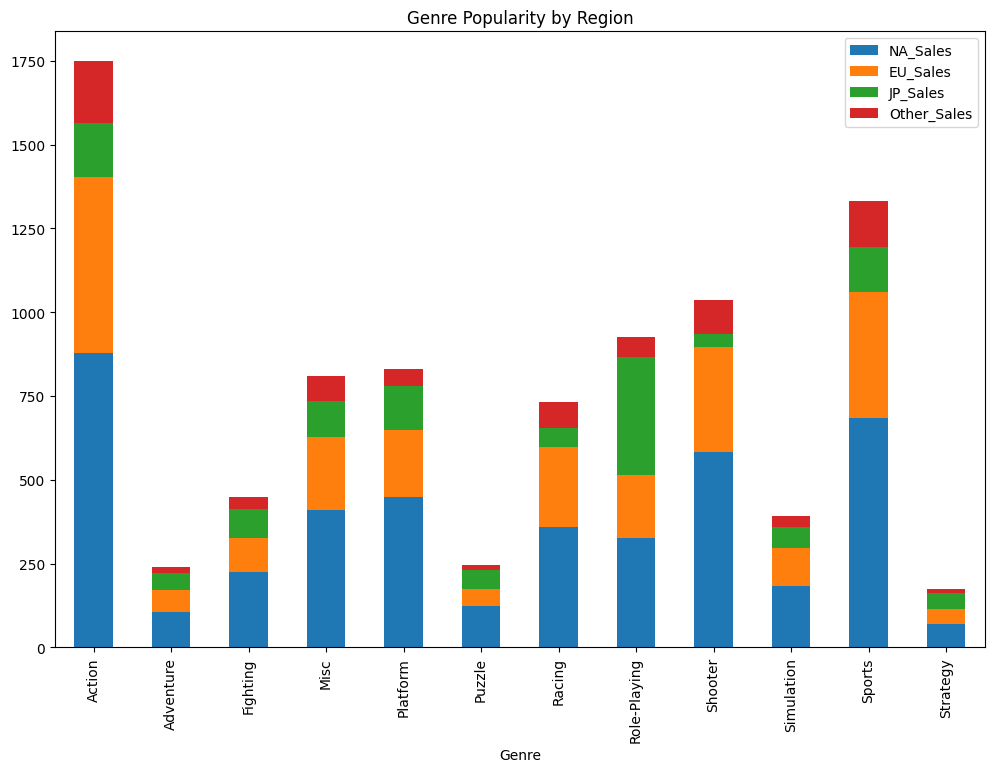

In [ ]:
genre_sales_by_region = df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_sales_by_region.plot(kind='bar', stacked=True, figsize=(12,8), title='Genre Popularity by Region')

<Axes: ylabel='Genre'>

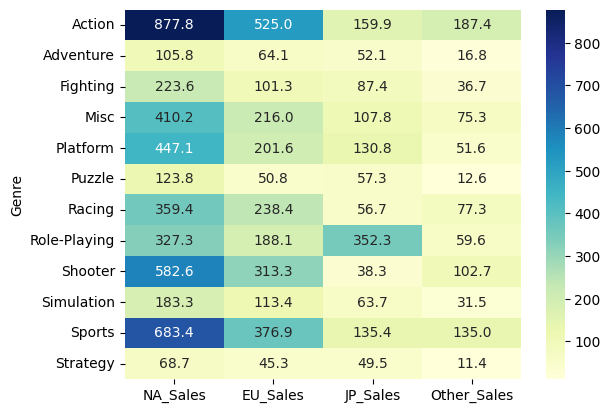

In [ ]:
import seaborn as sns
sns.heatmap(genre_sales_by_region, annot=True, cmap="YlGnBu", fmt=".1f")


<Axes: >

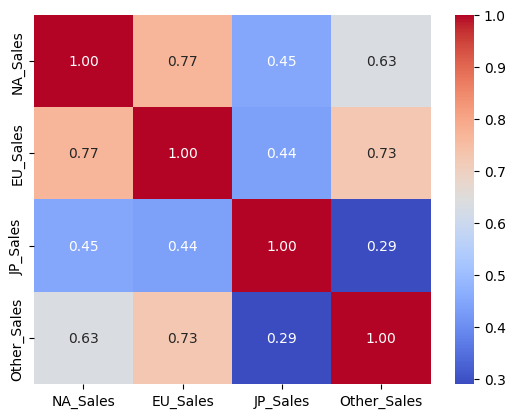

In [ ]:
regional_correlation = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()
sns.heatmap(regional_correlation, annot=True, cmap="coolwarm", fmt=".2f")

<Axes: title={'center': 'Top Publishers in North America'}, xlabel='Publisher'>

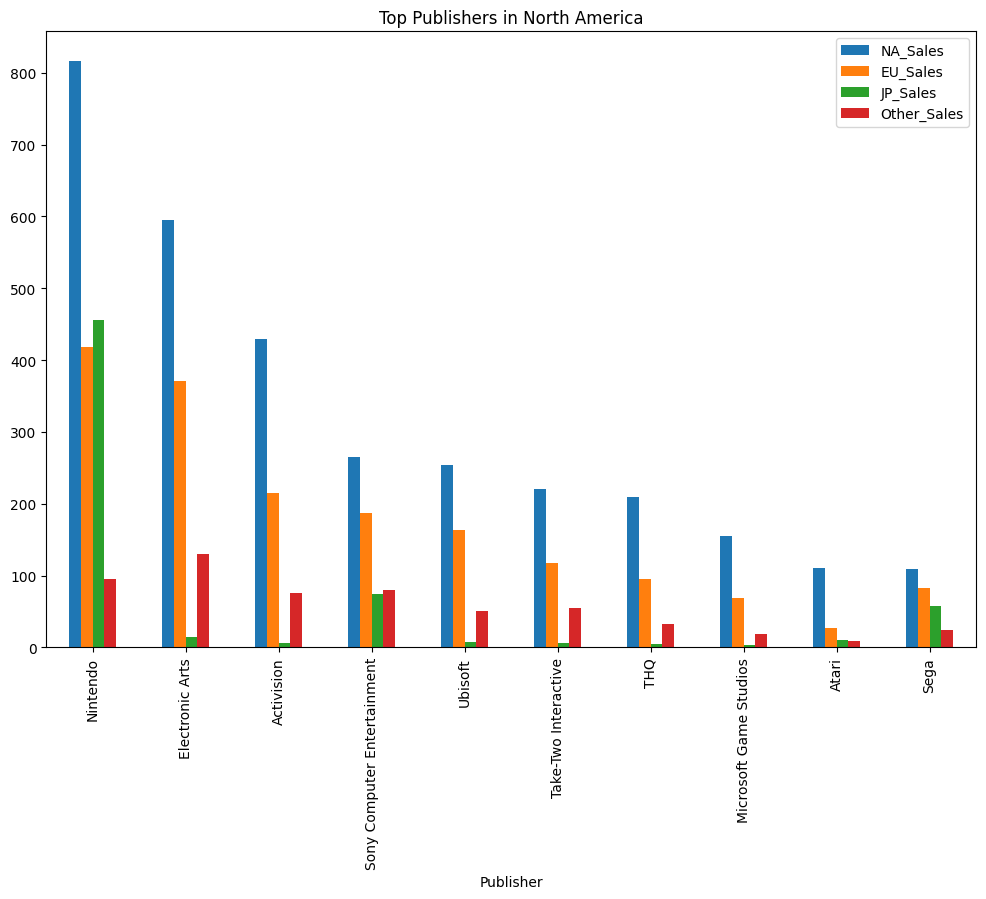

In [ ]:
top_publishers_by_region = df.groupby('Publisher').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_publishers_by_region.nlargest(10, 'NA_Sales').plot(kind='bar', figsize=(12,8), title='Top Publishers in North America')

<Axes: title={'center': 'Number of Games Released by Platform'}, xlabel='Platform'>

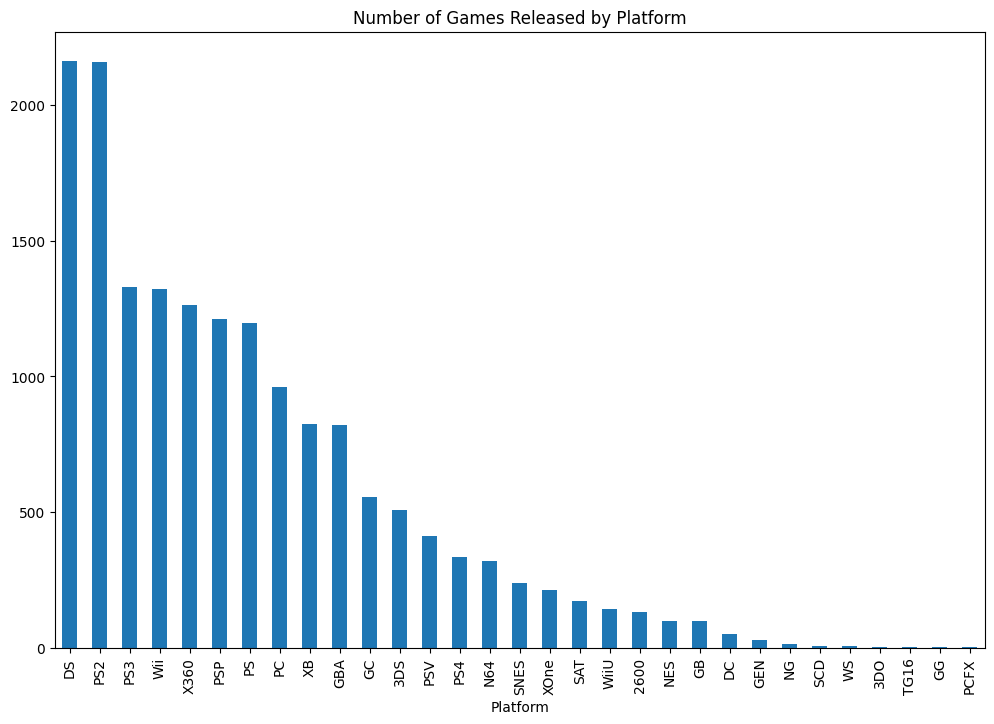

In [ ]:
games_per_platform = df['Platform'].value_counts()
games_per_platform.plot(kind='bar', figsize=(12,8), title='Number of Games Released by Platform')

Text(0, 0.5, 'Global Sales')

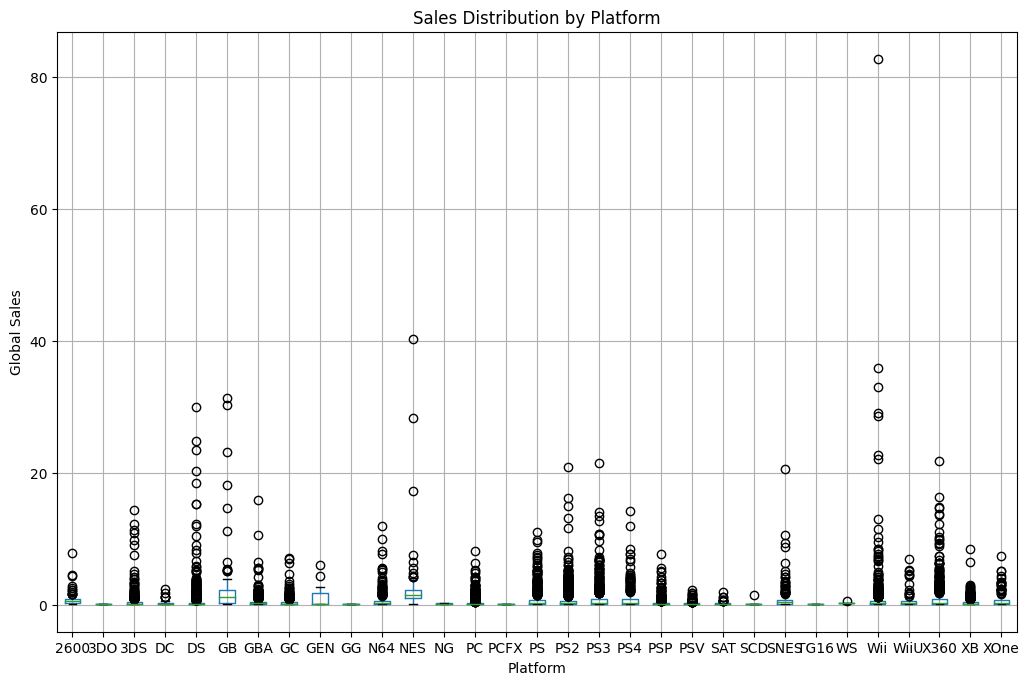

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column='Global_Sales', by='Platform', figsize=(12,8))
plt.title('Sales Distribution by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Global Sales')

In [ ]:
platform_lifespan = df.groupby('Platform')['Year'].agg(['min', 'max'])
platform_lifespan['Lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
platform_lifespan['Lifespan'].sort_values().plot(kind='barh', figsize=(12,8), title='Platform Lifespan')